# Q1

In this question, you will implement PLA on a 2D data set. There are 100 two-dimensional points on a plane as shown below. The coordinates of points are saved in first two columns in data.xlsx. The class labels of the points are saved in the third column in data.xlsx, where -1 represents blue and 1 represents red.

<img src="./image.png" alt="drawing" width="200" style="margin:auto;"/>

The data can be downloaded from https://docs.google.com/spreadsheets/d/1MUhIGVu2npn8CExs5yWVlYlwkx3XMSOC/edit?usp= sharing&ouid=100630789993461819414&rtpof=true&sd=true
Please implement PLA to find a boundary that can perfectly separate blue points and red
points. Write down the equations of the separator and plot the separator together with data.

**Notes:**

- You may choose to use any programming language for your own convenience. You are
only allowed to use libraries for linear algebra operations, such as matrix multiplication,
matrix inversion, matrix factorization, and so forth. You are not allowed to use any
existing machine learning or statistics toolkits or libraries or any open-source codes for
this question.
- Do not attach any code to the homework. Code for this question should be uploaded to
Moodle. Just write here the results, explanations, plots, etc.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
df = pd.read_csv("data.csv")

X = np.array(df[["x1", "x2"]])
y = np.array(df['class label'])

Separator equation: 2.8034980000000003x + -4.264396y + 1 = 0


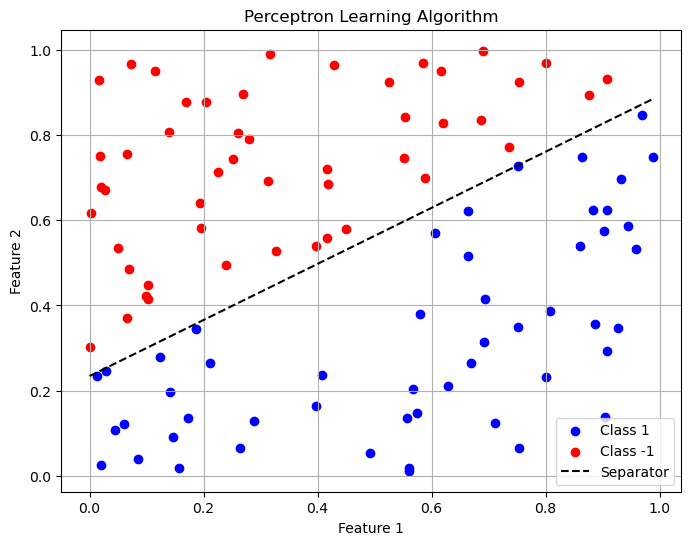

In [12]:


# Perceptron Learning Algorithm (PLA)
def perceptron_learning(X, y, max_iter=1000):
    """
    Implements PLA to find a separating hyperplane.

    Parameters:
        X: ndarray of shape (n_samples, n_features), input features.
        y: ndarray of shape (n_samples,), binary labels (+1 or -1).
        max_iter: int, maximum number of iterations.

    Returns:
        w: ndarray, learned weight vector.
        b: float, learned bias.
    """
    # Initialize weights and bias
    w = np.zeros(X.shape[1])
    b = 0

    for _ in range(max_iter):
        misclassified = 0
        for i in range(len(X)):

            if y[i] * (np.dot(w, X[i]) + b) <= 0:
                # Update the weights
                w += y[i] * X[i]
                b += y[i]
                misclassified += 1

        # Stop early if all points are correctly classified
        if misclassified == 0:
            break

    return w, b

# Plot the data and separator
def plot_data_with_separator(X, y, w, b):
    """
    Plots data points and the separator.

    Parameters:
        X: ndarray of shape (n_samples, n_features), input features.
        y: ndarray of shape (n_samples,), binary labels (+1 or -1).
        w: ndarray, learned weight vector.
        b: float, learned bias.
    """
    plt.figure(figsize=(8, 6))

    # Plot red and blue points
    for label, color in [(1, 'blue'), (-1, 'red')]:
        plt.scatter(X[y == label, 0], X[y == label, 1], label=f"Class {label}", color=color)

    # Plot the decision boundary
    x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_vals = -(w[0] * x_vals + b) / w[1]  # w1*x + w2*y + b = 0 -> y = -(w1*x + b)/w2
    plt.plot(x_vals, y_vals, 'k--', label='Separator')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Learning Algorithm')
    plt.legend()
    plt.grid(True)
    plt.show()


# Run PLA
w, b = perceptron_learning(X, y)

# Display results
print(f"Separator equation: {w[0]}x + {w[1]}y + {b} = 0")
plot_data_with_separator(X, y, w, b)


# Q5

Best separator equation: 2.8034980000000003x1 + -4.264396x2 + 1 = 0


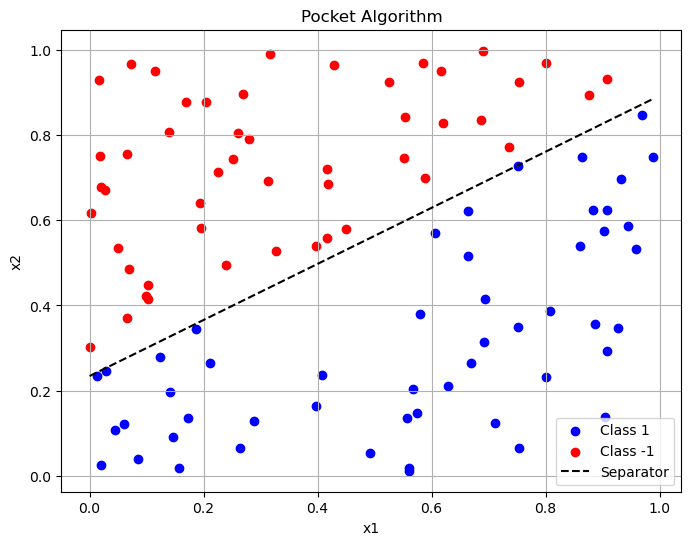

In [10]:
# Pocket Algorithm for PLA
def pocket_algorithm(X, y, max_iter=1000):
    """
    Implements the Pocket Algorithm for PLA.

    Parameters:
        X: ndarray of shape (n_samples, n_features), input features.
        y: ndarray of shape (n_samples,), binary labels (+1 or -1).
        max_iter: int, maximum number of iterations.

    Returns:
        best_w: ndarray, best weight vector found.
        best_b: float, best bias found.
    """
    # Initialize weights and bias
    w = np.zeros(X.shape[1])
    b = 0

    # Pocket to store best weights and their error count
    best_w = w.copy()
    best_b = b
    best_error = np.sum(y != np.sign(np.dot(X, w) + b))

    for _ in range(max_iter):
        for i in range(len(X)):
            if y[i] * (np.dot(w, X[i]) + b) <= 0:  # Misclassified point
                # Update weights and bias
                w += y[i] * X[i]
                b += y[i]
                
                # Calculate error count for new weights
                errors = np.sum(y != np.sign(np.dot(X, w) + b))
                
                # Update pocket if the new weights perform better
                if errors < best_error:
                    best_w = w.copy()
                    best_b = b
                    best_error = errors

    return best_w, best_b

# Plot the data and separator
def plot_data_with_separator(X, y, w, b):
    plt.figure(figsize=(8, 6))
    for label, color in [(1, 'blue'), (-1, 'red')]:
        plt.scatter(X[y == label, 0], X[y == label, 1], label=f"Class {label}", color=color)

    # Plot the decision boundary
    x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_vals = -(w[0] * x_vals + b) / w[1]  # w1*x + w2*y + b = 0 -> y = -(w1*x + b)/w2
    plt.plot(x_vals, y_vals, 'k--', label='Separator')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Pocket Algorithm')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run Pocket Algorithm
best_w, best_b = pocket_algorithm(X, y)
print(f"Best separator equation: {best_w[0]}x1 + {best_w[1]}x2 + {best_b} = 0")

# Plot the results
plot_data_with_separator(X, y, best_w, best_b)
